In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [76]:
file_url = '/content/drive/MyDrive/data_mining_project/data_encoded.csv'

data = pd.read_csv(file_url)

data

,Unnamed: 0,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,...,Model_xceed,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v
0,0,182707.0,4950,5,16.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,273250.0,8400,1,11.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,137528.0,7900,5,16.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4043.0,39900,5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,175144.0,9999,1,15.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,6377,14910.0,20495,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6378,6378,3877.0,17899,5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6379,6379,1300.0,21600,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6380,6380,30220.0,23910,4,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
#--- in order to train classification models I will divide the Price column of the dataset into three ranges, and
#--- classify the data into three classes Low, Medium, High.

In [78]:
data['Price Range'] = pd.qcut(data['Price'], q=3, labels=['Low', 'Medium', 'High'])

In [79]:
encoder = LabelEncoder()
data['Price Range'] = encoder.fit_transform(data['Price Range'])

In [80]:
#dest_path = '/content/drive/MyDrive/data_mining_project/data_encoded_classified.csv'
#data.to_csv(dest_path, index=False)

In [81]:
#files.download(dest_path)

In [82]:
mileage_scaler = MinMaxScaler()
data['Mileage'] = mileage_scaler.fit_transform(data[['Mileage']])

In [83]:
fuel_type_scaler = MinMaxScaler()
data['Fuel Type'] = fuel_type_scaler.fit_transform(data[['Fuel Type']])

In [84]:
age_scaler = MinMaxScaler()
data['Car Age'] = age_scaler.fit_transform(data[['Car Age']])

In [85]:
data

,Unnamed: 0,Mileage,Price,Fuel Type,Car Age,Brand_alfa romeo,Brand_audi,Brand_bmw,Brand_chevrolet,Brand_citroen,...,Model_xsara picasso,Model_yaris,Model_yaris cross,Model_yeti,Model_z4,Model_zafira,Model_zafira tourer,Model_zoe,Model_zr-v,Price Range
0,0,0.258231,4950,0.714286,0.239437,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.386201,8400,0.142857,0.169014,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.194377,7900,0.714286,0.239437,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.005714,39900,0.714286,0.014085,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.247541,9999,0.142857,0.225352,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377,6377,0.021073,20495,0.571429,0.028169,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6378,6378,0.005480,17899,0.714286,0.028169,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6379,6379,0.001837,21600,0.571429,0.014085,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6380,6380,0.042712,23910,0.571429,0.042254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [86]:
data['Price Range']

,Price Range
0,1
1,1
2,1
3,0
4,1
...,...
6377,2
6378,2
6379,2
6380,0


In [87]:
data = data.drop(columns=['Price'])

In [88]:
data = data.drop(columns=['Unnamed: 0'])

In [89]:
X, Y = data.drop(columns=['Price Range']), data['Price Range']

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [91]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [92]:
dt_preds = dt.predict(X_test)

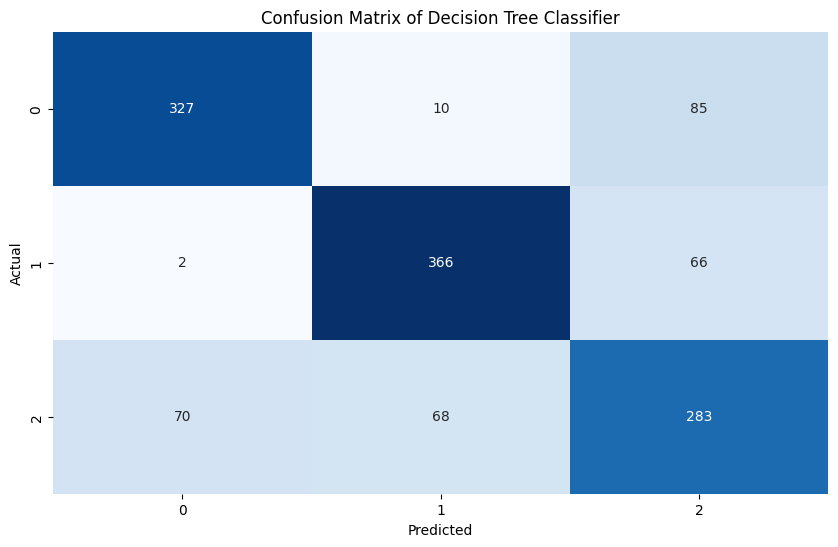

In [93]:
cfm = confusion_matrix(Y_test, dt_preds)

plt.figure(figsize=(10,6))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

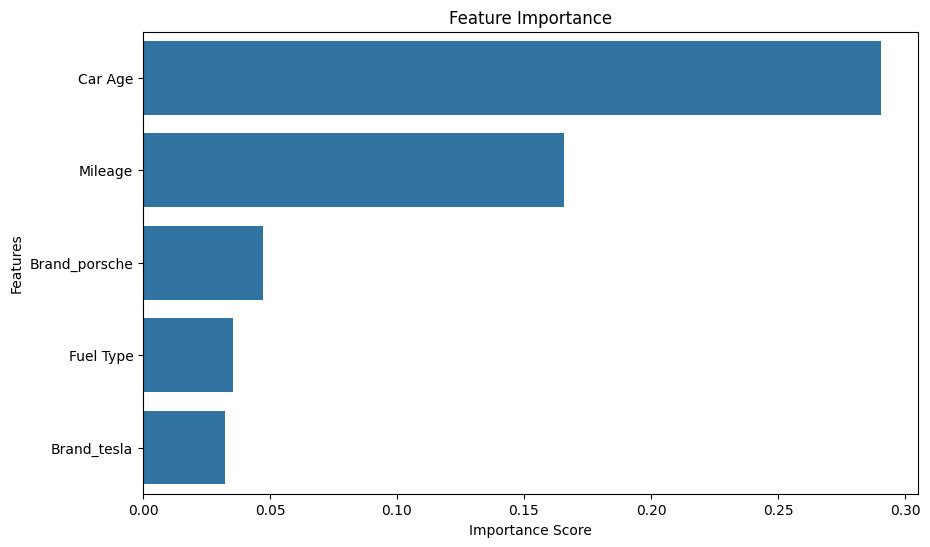

In [94]:
feature_importances = dt.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [95]:
report = classification_report(Y_test, dt_preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       422
           1       0.82      0.84      0.83       434
           2       0.65      0.67      0.66       421

    accuracy                           0.76      1277
   macro avg       0.77      0.76      0.76      1277
weighted avg       0.77      0.76      0.76      1277



 it seems like we have overfitting on this model. lets fit another models and compare the results. I will use Gaussian
 Naive Bayes classificator which assumes that the variables are independent from each other. Where we see in the
 Visualization part of this project that there is some dependency between some of the variables.

In [96]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [97]:
gnb_preds = gnb.predict(X_test)

In [98]:
report = classification_report(Y_test, gnb_preds)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.53      0.64       422
           1       0.87      0.21      0.33       434
           2       0.42      0.88      0.57       421

    accuracy                           0.54      1277
   macro avg       0.69      0.54      0.51      1277
weighted avg       0.70      0.54      0.51      1277



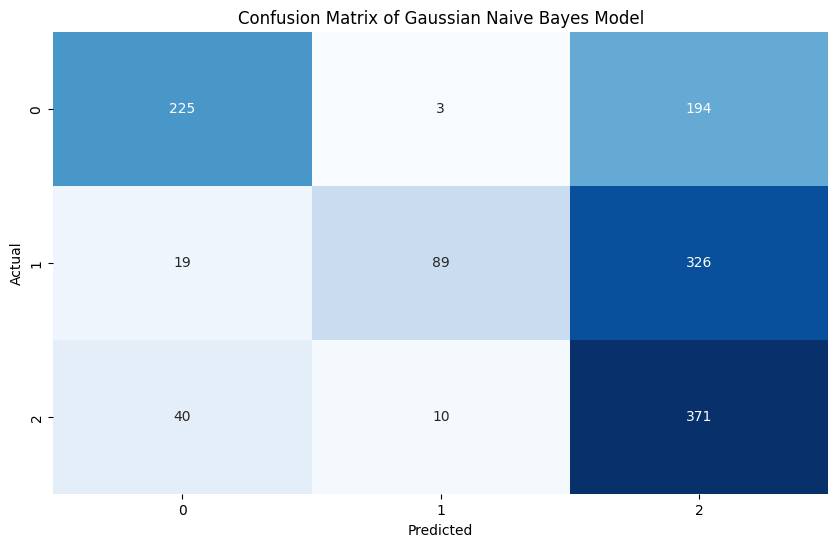

In [99]:
cfm = confusion_matrix(Y_test, gnb_preds)

plt.figure(figsize=(10,6))
sns.heatmap(cfm, annot=True,  fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Gaussian Naive Bayes Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As we can see the results are good but not as the previous model's. I thin that the reason is because Gaussian Naive Bayes classificator is a bit weaker for such datasets where some dependency between the variables exists.

### KNN Classifier

For this model I want to experiment with the values of the K so I will fit the model multiple times with different values of K, compare the results and than fit the model with best value for k.


In [100]:
accuracy_scores = []
for i in range(2,15):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  knn_preds = knn.predict(X_test)
  accuracy_scores.append(accuracy_score(Y_test, knn_preds))
  #print(f"For the value of the k={i}, f1_score:{f1_score(Y_test, knn_preds)},recall:{recall_score(Y_test, knn_preds)}, precision:{precision_score(Y_test, knn_preds)}")

Text(0, 0.5, 'Mean Error')

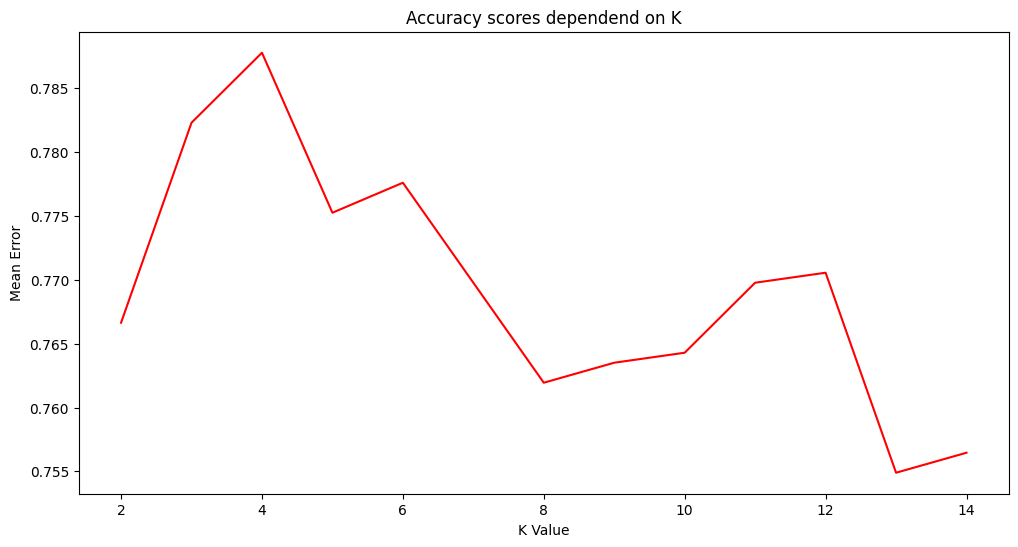

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 15), accuracy_scores, color='red', markersize=5)
plt.title('Accuracy scores dependend on K')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


It is clear that for the value of k=5 we have the best accuracy score of the model.


In [102]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_preds = knn.fit(X_train, Y_train).predict(X_test)

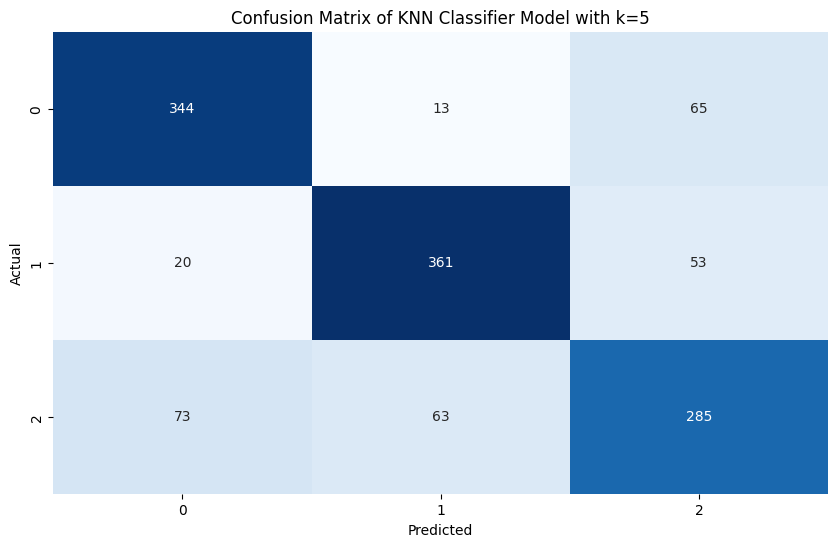

In [103]:
cfm = confusion_matrix(Y_test, knn_preds)

plt.figure(figsize=(10,6))
sns.heatmap(cfm, annot=True,  fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of KNN Classifier Model with k=5')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [104]:
report = classification_report(Y_test, knn_preds)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       422
           1       0.83      0.83      0.83       434
           2       0.71      0.68      0.69       421

    accuracy                           0.78      1277
   macro avg       0.77      0.77      0.77      1277
weighted avg       0.77      0.78      0.77      1277



### Random Forest Classifier


Like with the previous model Random Forest Classifier uses hyperparameters. One of them is the max_depth and i will experiment with that parameter in order to get good results but at the same time to prevent overfitting.

In [105]:
accuracy_scores = []
errors = []
for i in range(1, 30):
  rfc = RandomForestClassifier(max_depth=i)
  preds = rfc.fit(X_train, Y_train).predict(X_test)
  accuracy_scores.append(accuracy_score(Y_test, preds))
  errors.append((np.mean(preds != Y_test)))

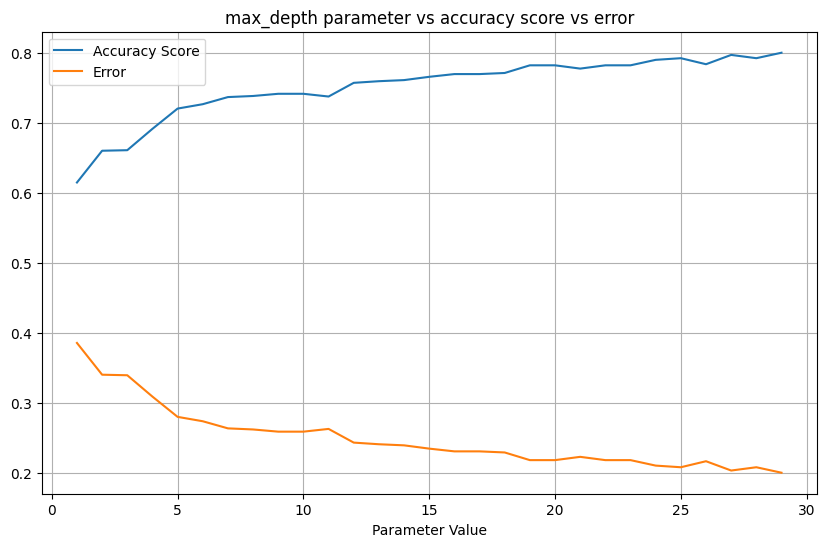

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), accuracy_scores, markersize=5, label='Accuracy Score')
plt.plot(range(1,30), errors, markersize=5, label='Error')
plt.title("max_depth parameter vs accuracy score vs error")
plt.xlabel('Parameter Value')
plt.legend(loc='best')
plt.grid()
plt.show()

From the visualization we can see that the optimal value for the parameter is 15. Anything under it kind a underfits the data and anythin over that overfits the data.


In [107]:
rfc = RandomForestClassifier(max_depth=15)
rfc_preds = rfc.fit(X_train, Y_train).predict(X_test)

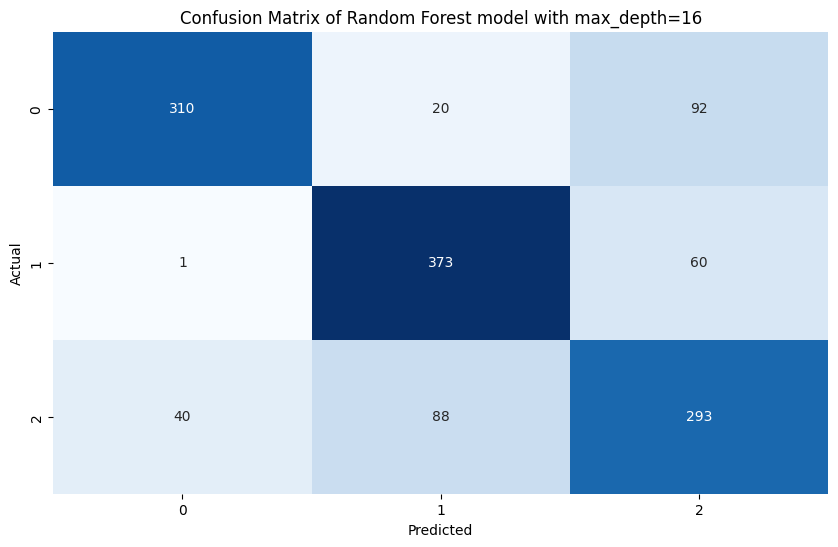

In [108]:
cfm = confusion_matrix(Y_test, rfc_preds)

plt.figure(figsize=(10,6))
sns.heatmap(cfm, annot=True,  fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest model with max_depth=16')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [109]:
report = classification_report(Y_test, rfc_preds)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       422
           1       0.78      0.86      0.82       434
           2       0.66      0.70      0.68       421

    accuracy                           0.76      1277
   macro avg       0.77      0.76      0.76      1277
weighted avg       0.77      0.76      0.77      1277

